# Creating Panoramas using OpenCV

## Import the Libraries

In [1]:
# Import Libraries
import os
import cv2
import math
import glob
import matplotlib.pyplot as plt

%matplotlib inline

## Steps for Creating Panoramas

1. Find keypoints in all images
2. Find pairwise correspondences
2. Estimate pairwise Homographies
3. Refine Homographies
3. Stitch with Blending

In [2]:
# Read Images
imagefiles = glob.glob(f"datos/Panorama{os.sep}*")
imagefiles.sort()

images = []
for filename in imagefiles:
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)

num_images = len(images)

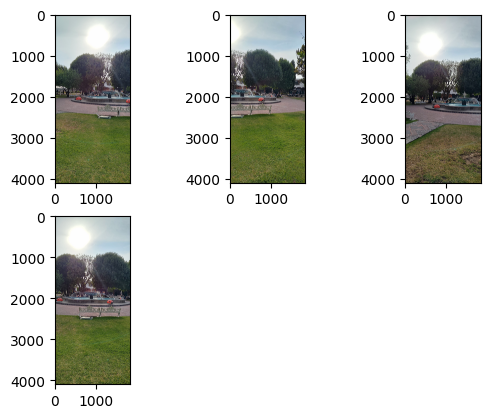

In [3]:
# Display Images
plt.figure()
num_cols = 3
num_rows = math.ceil(num_images / num_cols)
for i in range(0, num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(images[i])

## Use the Sticher Class

The Stitcher class is used to combine multiple overlapping images into a single panoramic image. It is particularly useful when you have a series of photos taken from slightly different angles or positions and want to merge them seamlessly.

1. Feature Detection and Matching :
    - The Stitcher detects keypoints and descriptors (e.g., using SIFT, SURF, or ORB) in the input images.
    - It then matches these features across images to find correspondences.
2. Homography Estimation :
    - Using the matched features, the Stitcher computes a homography matrix that aligns one image with another.
3. Image Warping :
    - The images are warped (transformed) based on the computed homographies to align them properly.
4. Blending :
    - The aligned images are blended together to create a smooth transition between overlapping regions, resulting in a seamless panoramic image.

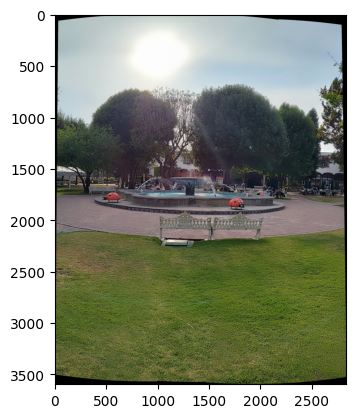

In [4]:
# Create stitcher object
stitcher = cv2.Stitcher_create()
# Perform stitching 
status, result = stitcher.stitch(images)
if status == 0:
    plt.figure()
    plt.imshow(result)